<a href="https://colab.research.google.com/github/RickyMacharm/WorldQuant_Python/blob/master/WQU_Econometrics_GroupWork_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Running R on Colab
In order to run R successfully on colab, we need to execute the following code `%load_ext rpy2.ipython` in a cell first of all.

In [0]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


For every cell we next run, if the codes are R codes, we would need to remember to include `%%R` at the begining of the cell.

To be able to access the Apple data, we need to use a library called `quantmod`. We check if it is installed, if not we installing it before bringing it out to use.

In [0]:
%%R
if (!require("quantmod")) {
      install.packages("quantmod")
      library(quantmod)
  }


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: quantmod

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.11-2.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 5

In [0]:
%%R
start <- as.Date('2009-01-01');end <- as.Date('2019-10-01')


Let's get Apple stock data; Apple's ticker symbol is AAPL. We use the quantmod function getSymbols, and pass a string as a first argument to
 identify the desired ticker symbol, pass 'yahoo' to src for `Yahoo! Finance`, and from and to specify date ranges.
 
The default behavior for getSymbols is to load data directly into the global environment, with the object being named after the loaded ticker symbol. 


In [0]:
%%R
getSymbols("AAPL", src = "yahoo", from = start, to = end)


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.


  warnings.warn(x, RRuntimeWarning)


[1] "AAPL"


The output `"AAPL"`shows we have successfully loaded the stock. Let us now see the first few rows.

In [0]:
%%R
head(AAPL)


           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2009-01-02  12.26857  13.00571 12.16571   12.96429   186503800      11.31410
2009-01-05  13.31000  13.74000 13.24429   13.51143   295402100      11.79160
2009-01-06  13.70714  13.88143 13.19857   13.28857   322327600      11.59711
2009-01-07  13.11571  13.21429 12.89429   13.00143   188262200      11.34652
2009-01-08  12.91857  13.30714 12.86286   13.24286   168375200      11.55722
2009-01-09  13.31571  13.34000 12.87714   12.94000   136711400      11.29291


## Testing for ARCH Effects

We now calculate the returns for the purpose of testing for ARCH Effects

In [0]:
%%R
Returns <- dailyReturn(Cl(AAPL), type='log')

let's plot

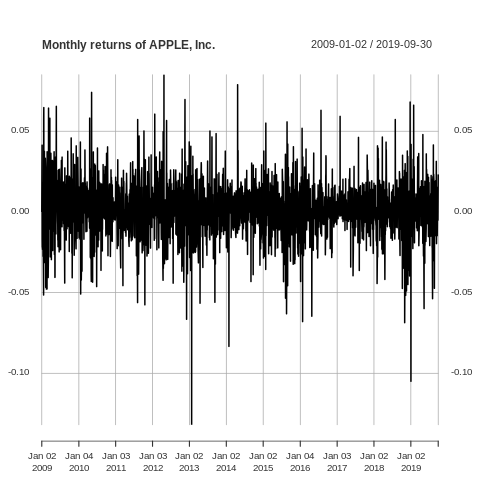

In [0]:
%%R
plot(Returns, main = "Monthly returns of APPLE, Inc.",
     xlab = "Date", ylab = "Return in percent")

We will use the Lyung-Box test to verify our suspicions.

In [0]:
%%R
Box.test(coredata(Returns^2), type = "Ljung-Box", lag = 12)


	Box-Ljung test

data:  coredata(Returns^2)
X-squared = 113.39, df = 12, p-value < 2.2e-16



We can reject the null hypothesis of no autocorrelations in the squared returns at the
1% significance level.

The test confirms that ARCH effects exist in the monthly Apple returns; hence,
an ARCH or GARCH model should be employed in modeling the return time series.

We will Now use the `rugarch` library for that.

In [0]:
%%R
if (!require('rugarch')) {
      install.packages("rugarch")
      library('rugarch')
  }

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: rugarch

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘mvtnorm’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘nloptr’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘expm’, ‘RcppArmadillo’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/truncnorm_1.0-8.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py

First, we need to specify the model using the function `ugarchspec`. For a
GARCH(1,1) model, we need to set the garchOrder to `c(1,1)` and the model for the mean `(mean.model)` should be a white noise process and hence equal to `armaOrder = c(0,0)` 

In [0]:
%%R
garch11.spec = ugarchspec(variance.model = list(model="sGARCH",
                      garchOrder=c(1,1)), mean.model = list(armaOrder=c(0,0)))

In [0]:
%%R
aapl.garch11.fit = ugarchfit(spec=garch11.spec, data=Returns)

aapl.garch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001659    0.000292   5.6728        0
omega   0.000018    0.000003   5.4394        0
alpha1  0.103497    0.017101   6.0521        0
beta1   0.835964    0.023605  35.4150        0

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001659    0.000312   5.3243 0.000000
omega   0.000018    0.000005   3.5240 0.000425
alpha1  0.103497    0.023499   4.4043 0.000011
beta1   0.835964    0.033896  24.6623 0.000000

LogLikelihood : 7325.358 

Information Criteria
------------------------------------
                    
Akaike       -5.4152
Bayes        -5.4065
Shibata      -5.4152
Hannan-Quinn -5.4120

Weig

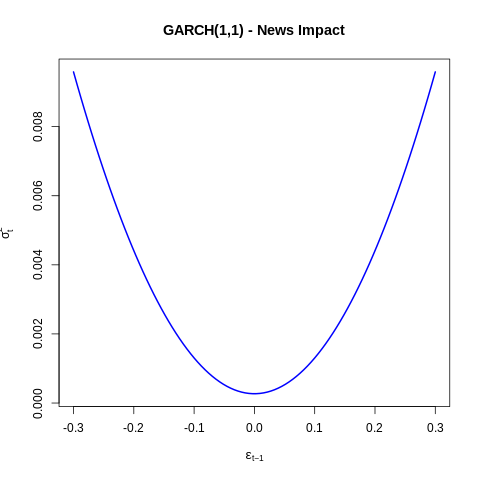

In [0]:
%%R
ni.garch11 <- newsimpact(aapl.garch11.fit)
plot(ni.garch11$zx, ni.garch11$zy, type="l", lwd=2, col="blue",
main="GARCH(1,1) - News Impact", ylab=ni.garch11$yexpr, xlab=ni.garch11$xexpr)

In [0]:
%%R
egarch11.spec = ugarchspec(variance.model = list(model="eGARCH",
                      garchOrder=c(1,1)), mean.model = list(armaOrder=c(0,0)))

aapl.egarch11.fit = ugarchfit(spec=egarch11.spec, data=Returns)

aapl.egarch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001213    0.000281   4.3111  1.6e-05
omega  -0.521394    0.117245  -4.4471  9.0e-06
alpha1 -0.117948    0.007290 -16.1791  0.0e+00
beta1   0.936148    0.014185  65.9939  0.0e+00
gamma1  0.161032    0.015905  10.1247  0.0e+00

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001213    0.000392   3.0910 0.001995
omega  -0.521394    0.367003  -1.4207 0.155410
alpha1 -0.117948    0.044536  -2.6484 0.008088
beta1   0.936148    0.044599  20.9903 0.000000
gamma1  0.161032    0.044966   3.5812 0.000342

LogLikelihood : 7380.487 

Information Criteria
------------------------------------
                

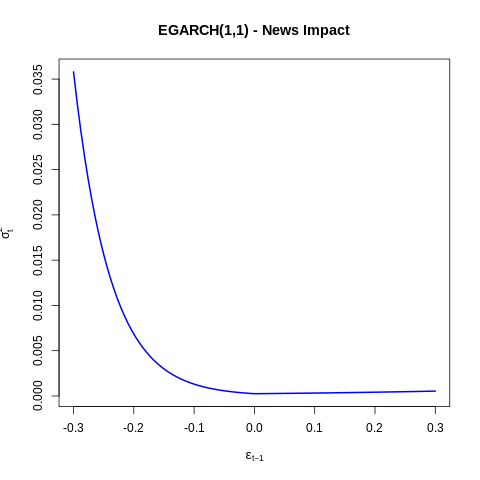

In [0]:
%%R
ni.egarch11 <- newsimpact(aapl.egarch11.fit)

plot(ni.egarch11$zx, ni.egarch11$zy, type="l", lwd=2, col="blue",main="EGARCH(1,1) - News Impact",
      ylab=ni.egarch11$yexpr, xlab=ni.egarch11$xexpr)

In [0]:
%%R
# specify TGARCH(1,1) model with only constant in mean equation
tgarch11.spec = ugarchspec(variance.model = list(model="fGARCH",
    submodel="TGARCH", garchOrder=c(1,1)),
    mean.model = list(armaOrder=c(0,0)))

aapl.tgarch11.fit = ugarchfit(spec=tgarch11.spec, data=Returns)


aapl.egarch11.fit


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: eGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001213    0.000281   4.3111  1.6e-05
omega  -0.521394    0.117245  -4.4471  9.0e-06
alpha1 -0.117948    0.007290 -16.1791  0.0e+00
beta1   0.936148    0.014185  65.9939  0.0e+00
gamma1  0.161032    0.015905  10.1247  0.0e+00

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001213    0.000392   3.0910 0.001995
omega  -0.521394    0.367003  -1.4207 0.155410
alpha1 -0.117948    0.044536  -2.6484 0.008088
beta1   0.936148    0.044599  20.9903 0.000000
gamma1  0.161032    0.044966   3.5812 0.000342

LogLikelihood : 7380.487 

Information Criteria
------------------------------------
                

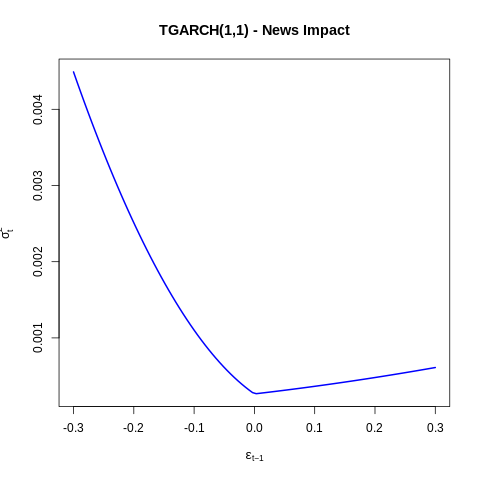

In [0]:
%%R
ni.tgarch11 <- newsimpact(aapl.tgarch11.fit)

plot(ni.tgarch11$zx, ni.tgarch11$zy, type="l", lwd=2, col="blue", 
     main="TGARCH(1,1) - News Impact", ylab=ni.tgarch11$yexpr, xlab=ni.tgarch11$xexpr)

### FORECASTING


*-----------------------------------*
*     GARCH Bootstrap Forecast      *
*-----------------------------------*
Model : eGARCH
n.ahead : 10
Bootstrap method:  partial
Date (T[0]): 2019-09-30

Series (summary):
           min      q.25     mean     q.75      max forecast[analytic]
t+1  -0.068703 -0.005397 0.001909 0.010533 0.085869           0.001786
t+2  -0.053046 -0.005695 0.002647 0.010519 0.084367           0.001679
t+3  -0.082251 -0.008124 0.000635 0.008616 0.054940           0.001181
t+4  -0.080854 -0.006466 0.000734 0.008324 0.081608           0.001161
t+5  -0.075187 -0.007642 0.000153 0.009131 0.071604           0.001148
t+6  -0.054865 -0.006391 0.002396 0.010929 0.064872           0.001147
t+7  -0.046887 -0.007015 0.001040 0.009635 0.058612           0.001147
t+8  -0.077506 -0.007172 0.000820 0.009733 0.064822           0.001147
t+9  -0.056066 -0.006628 0.001187 0.009617 0.060538           0.001147
t+10 -0.055714 -0.006258 0.001318 0.009393 0.096704           0.001147
......

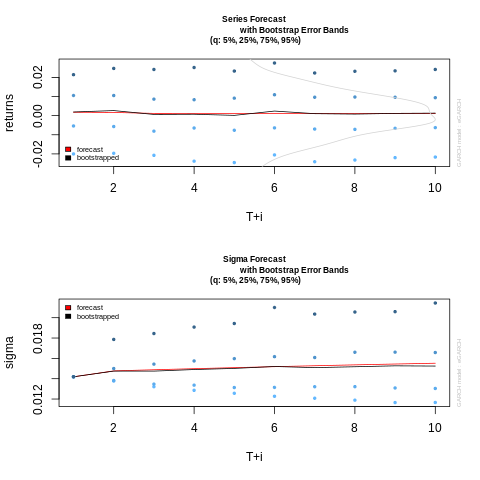

In [0]:
%%R
egarch11.spec = ugarchspec(variance.model = list(model="eGARCH",
                      garchOrder=c(2,1)), mean.model = list(armaOrder=c(2,0)))

aapl.egarch11.fit = ugarchfit(spec=egarch11.spec, data=Returns)


aapl.egarch11.fcst <- ugarchboot(aapl.egarch11.fit, n.ahead=10, 
                                method=c('Partial','full')[1])

print(aapl.egarch11.fcst)

plot(aapl.egarch11.fcst, which='all')